## Overview - FaceNet Notebook!
- This notebook will allow you to probe the representations of a deep, convolutional neural network trained to represent faces (FaceNet).
- Specifically, you can upload images, pass them through your deep neural network, and then evaluate how similar the images are in the low-dimensional "embedding space" of the network.

## Instructions
- The cells of this notebook are intended to be run in order. To run a cell, place the cursor in the cell and hit "Shift + Enter".

## General Setup, Importing Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
%config InlineBackend.figure_format='retina'
# %matplotlib notebook
%matplotlib inline
sns.set(rc={'figure.figsize':(15.7,8.27)})
np.set_printoptions(suppress=True)

In [3]:
from lib import *

### download some demo images

In [4]:
!chmod u+x ./images/download.sh
!./images/download.sh

/home/jovyan/images 100%[===================>]  96.21K  --.-KB/s    in 0.04s   
/home/jovyan/images 100%[===================>] 116.92K  --.-KB/s    in 0.04s   
/home/jovyan/images 100%[===================>] 145.40K  --.-KB/s    in 0.05s   
/home/jovyan/images 100%[===================>]  62.19K  --.-KB/s    in 0.03s   
/home/jovyan/images 100%[===================>]  51.92K  --.-KB/s    in 0.02s   
/home/jovyan/images 100%[===================>]   3.50M  --.-KB/s    in 0.08s   
/home/jovyan/images 100%[===================>]  60.30K  --.-KB/s    in 0.03s   


## Step 1 - upload Images
- Here you can upload any images you plan to use. Images will be placed in the "images" folder.

In [5]:
show_upload()

## Step 2 - specify image pairs
- Here we need to tell the program which pairs of images we want to compare.
- The program assumes each image is in the images folder.
- If the program fails to find your images, double check your filename (case sensitive!)

In [6]:
# this command will list all of the .jpg images in your folder
!ls images/*.jpg

images/BaldBear.jpg		  images/DiCaprio_NegativeClooney.jpg
images/BrownBear.jpg		  images/DiCaprio_Positive.jpg
images/DiCaprio_Anchor.jpg	  images/Gorilla.jpg
images/DiCaprio_HardNegative.jpg


In [7]:
# here we define a list [ ... ]
# with a comma-separated set of "tuples" ( ... )
# that define pairs of images to be compared
image_pairs = [
    ('DiCaprio_Anchor.jpg', 'DiCaprio_Positive.jpg'),
    ('DiCaprio_Anchor.jpg', 'DiCaprio_NegativeClooney.jpg'),
    ('DiCaprio_Anchor.jpg', 'DiCaprio_HardNegative.jpg')
]

## Step 3 - create a dataset for your image_pairs

In [8]:
dataset = get_dataset(image_pairs)
dataset

Dataset ImageListDataset
    Number of Images: 6
    Compose(
    Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
)

## Step4 - visualize image pairs

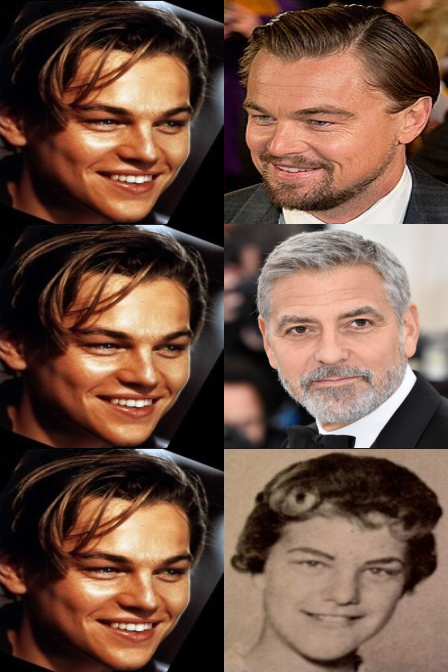

In [9]:
show_grid(dataset)

## Step5 - compute embedding using trained FaceNet

In [10]:
# warning, this might be slow!
embeddings = compute_embeddings(dataset)

Computing Embeddings (N=6 images)


## Step6 - compare embeddings

In [11]:
results = compare_embeddings(embeddings, image_pairs)
results

,pair_num,image1,image2,euclidean_distance
0,0,DiCaprio_Anchor.jpg,DiCaprio_Positive.jpg,1.081127
1,1,DiCaprio_Anchor.jpg,DiCaprio_NegativeClooney.jpg,1.850146
2,2,DiCaprio_Anchor.jpg,DiCaprio_HardNegative.jpg,0.894828


## Step7 - plot results

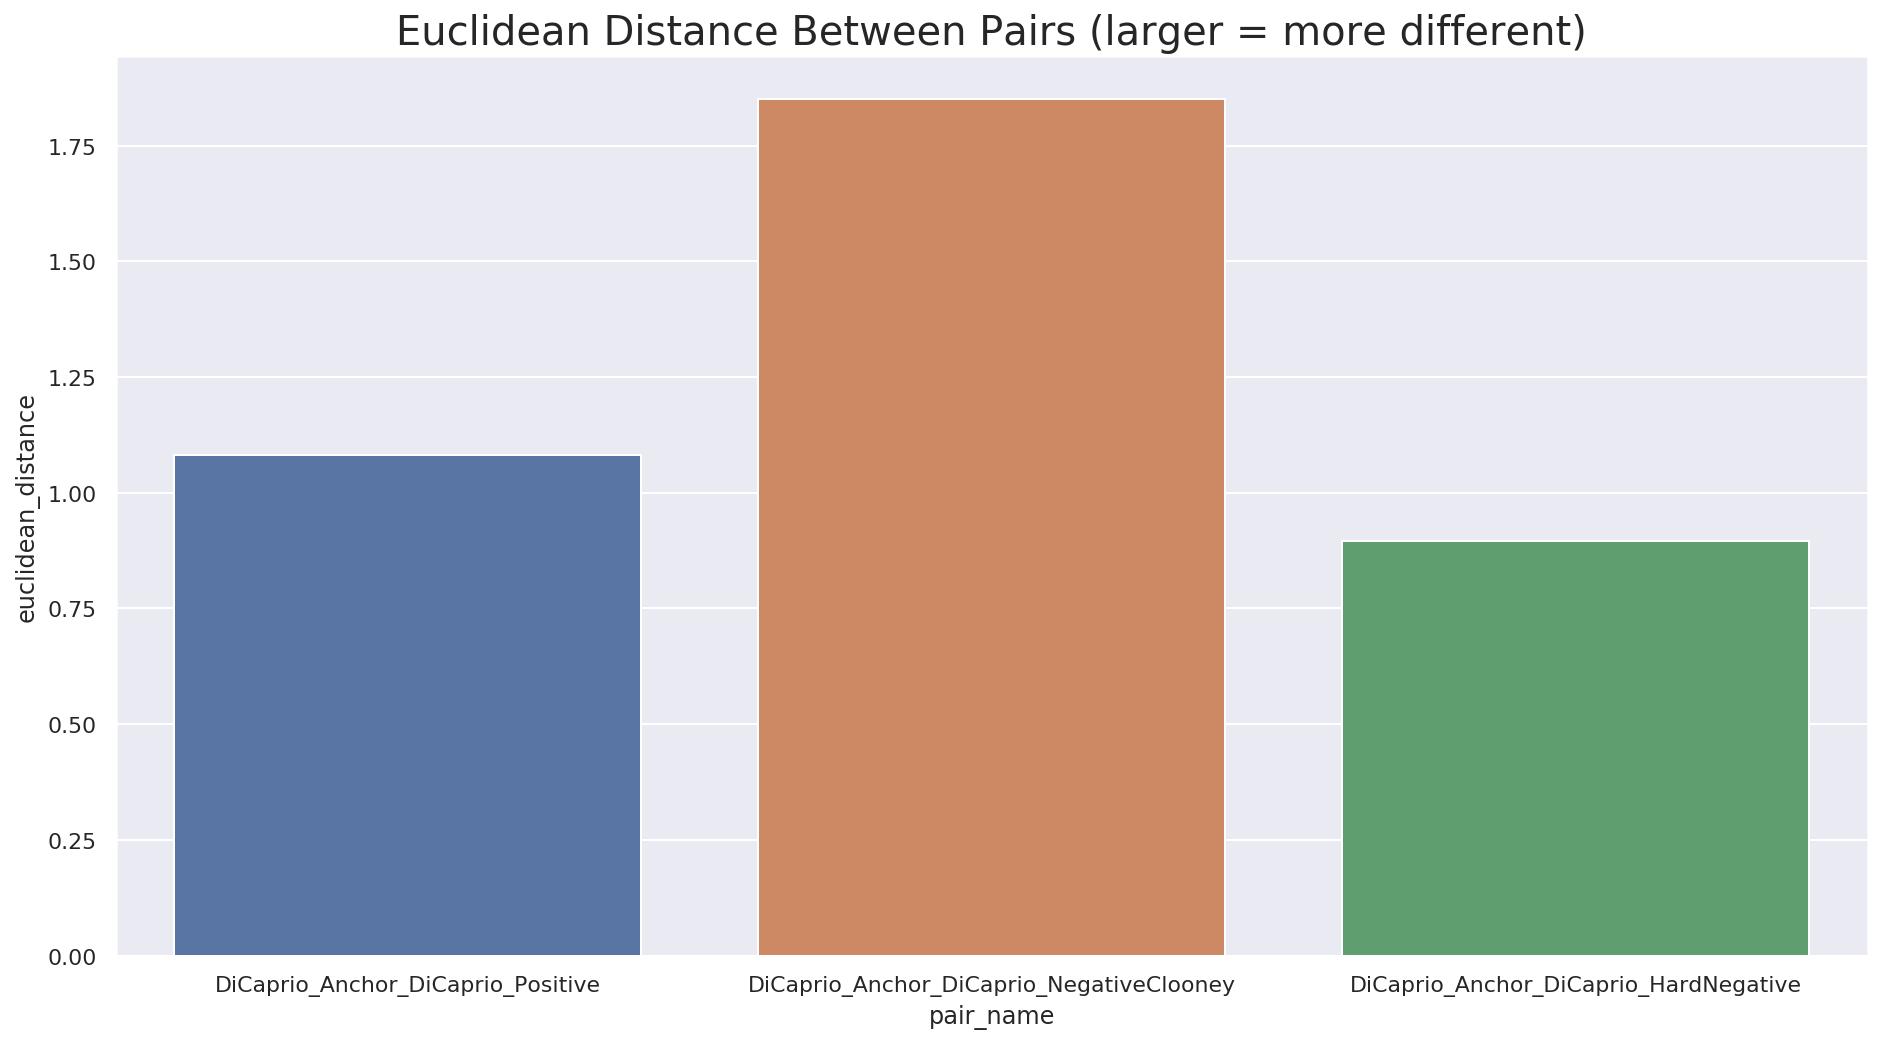

In [12]:
plot_results(results);

## Step8 - document your observations and conclusions

### observations
The Leo Anchor is more similar to the other Leo picture (DiCaprio_Positive), than to George Clooney (Negative Clooney), but NOT to the "Hard Negative"!!!

### interpretation
The network agrees that the "Hard Negative" Looks more like Leo than other people, or even other pictures of himself.

### discussion: 
***Does this agree with your subjective impression?***  
Definitely, but I wonder if the pose matters.

***What conclusions would you draw about the network based on these results?***  
I think this network does a pretty good job capturing face representations, and explaining why we say someone "looks like" someone else.

### Step9 - Export your report TWICE, and upload to the course website
- Download as -> Notebook (.ipynb) -> LastName_FirstName_Project1.ipynb
- Download as -> HTML -> LastName_FirstName_Project1.html
- upload your files, including images, to the course website